In [22]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'u6xJftT56e6-d3dxBu4G'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2018-12-31' }, paginate=True)
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
print(table)

            adj_close                                           
ticker            CNP          F         GE     TSLA         WMT
date                                                            
2016-01-04  16.749029  12.366951  29.016236  223.410   58.532144
2016-01-05  16.904876  12.145638  29.044581  223.430   59.922592
2016-01-06  16.694024  11.605635  28.581606  219.040   60.522580
2016-01-07  16.363994  11.242682  27.372203  215.650   61.932075
2016-01-08  16.327324  11.101042  26.880883  211.000   60.513056
2016-01-11  16.134806  11.304650  27.003713  207.850   61.160662
2016-01-12  15.859781  11.375470  27.060404  209.970   60.589245
2016-01-13  15.648928  10.800057  26.682465  200.310   58.970231
2016-01-14  16.162309  10.791205  27.457239  206.180   60.055923
2016-01-15  15.859781  10.596449  26.918677  204.990   58.979754
2016-01-19  16.043131  10.578744  26.918677  204.720   59.579742
2016-01-20  15.493081  10.534482  26.455702  198.700   57.941680
2016-01-21  15.978958  10

           adj_close                                        
ticker           CNP         F        GE      TSLA       WMT
date                                                        
2016-01-04       NaN       NaN       NaN       NaN       NaN
2016-01-05  0.009305 -0.017895  0.000977  0.000090  0.023755
2016-01-06 -0.012473 -0.044461 -0.015940 -0.019648  0.010013
2016-01-07 -0.019769 -0.031274 -0.042314 -0.015477  0.023289
2016-01-08 -0.002241 -0.012598 -0.017950 -0.021563 -0.022913
2016-01-11 -0.011791  0.018341  0.004569 -0.014929  0.010702
2016-01-12 -0.017045  0.006265  0.002099  0.010200 -0.009343
2016-01-13 -0.013295 -0.050584 -0.013966 -0.046007 -0.026721
2016-01-14  0.032806 -0.000820  0.029037  0.029305  0.018411
2016-01-15 -0.018718 -0.018048 -0.019615 -0.005772 -0.017919
2016-01-19  0.011561 -0.001671  0.000000 -0.001317  0.010173
2016-01-20 -0.034286 -0.004184 -0.017199 -0.029406 -0.027494
2016-01-21  0.031361  0.009244  0.021071  0.006392  0.017094
2016-01-22  0.020080  0.

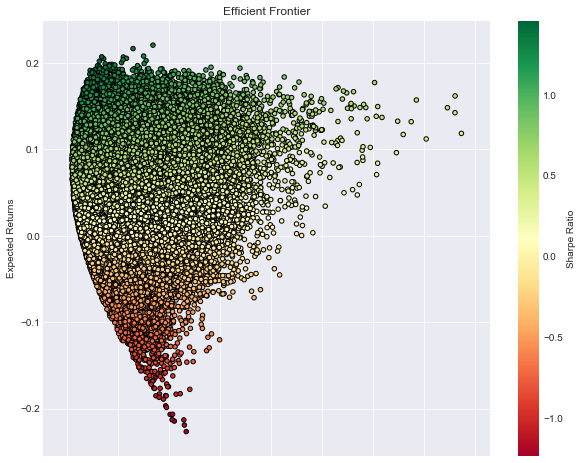

In [23]:

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250
print(returns_daily)
# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(2)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

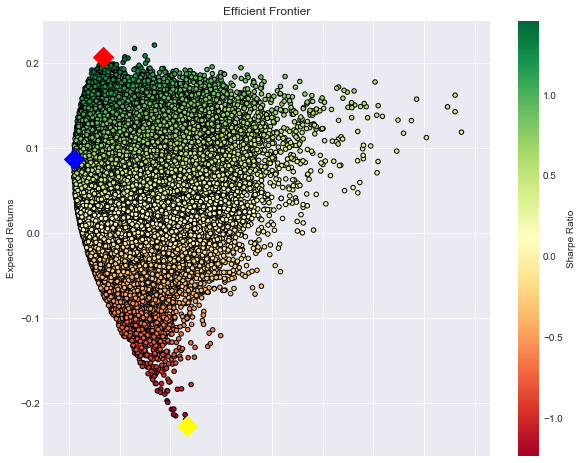

In [15]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
min_return = df['Returns'].min()
max_return = df['Returns'].max()
min_sharpe = df['Sharpe Ratio'].min()
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
sharpe_portfolio_min = df.loc[df['Sharpe Ratio'] == min_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_return_port = df.loc[df['Returns'] == max_return]
min_return_port = df.loc[df['Returns'] == min_return]
# plot frontier, max sharpe & min Volatility values, min & max Returns, with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=sharpe_portfolio_min['Volatility'], y=sharpe_portfolio_min['Returns'], c='yellow', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
#plt.scatter(x=max_return_port['Volatility'], y=max_return_port['Returns'], c='yellow', marker='D', s=200 )
#plt.scatter(x=min_return_port['Volatility'], y=min_return_port['Returns'], c='green', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [13]:
print(min_variance_port.T)
print(sharpe_portfolio.T)
print(sharpe_portfolio_min.T)

                 24031
Returns       0.079441
Volatility    0.127426
Sharpe Ratio  0.623431
CNP Weight    0.374820
F Weight      0.150835
WMT Weight    0.179826
GE Weight     0.035766
TSLA Weight   0.258754
                 22050
Returns       0.211123
Volatility    0.142787
Sharpe Ratio  1.478589
CNP Weight    0.576238
F Weight      0.001431
WMT Weight    0.001446
GE Weight     0.078993
TSLA Weight   0.341892
                 24976
Returns      -0.232519
Volatility    0.190919
Sharpe Ratio -1.217895
CNP Weight    0.002110
F Weight      0.014306
WMT Weight    0.814310
GE Weight     0.156018
TSLA Weight   0.013256


1. Pick companies
2. Risk
   max return == max sharpe ratio
   min return == min sharpe ratio
   